In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/CurieTrainingDatasets/Dalmiro_Laura/LandmarkData/'
npz_name = 'Landmark128.npz'
npz_val_name = 'Landmark128Val.npz'


model_dir = '/home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'Landmark128K7.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 10
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 128
imagey = 128

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         residual = residual, depth = depth, start_kernel = start_kernel, stride = stride, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=10, box_vector=2, categories=2, depth=29, epochs=250, gridx=1, gridy=1, imagex=128, imagey=128, key_categories={'Background': 0, 'Landmark': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='Landmark128K7.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/CurieTrainingDatasets/Dalmiro_Laura/LandmarkData/', npz_name='Landmark128.npz', npz_val_name='Landmark128Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 2656
image size (2D):		 (128, 128)
axes:				 SXYC
channels in / out:		 1
number of  images:	 140
image size (2D):		 (128, 128)
axes:				 SXYC
channels in / out:		 1
(2656, 1, 1, 4) 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
______

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2656 samples, validate on 140 samples
Epoch 1/250
2656/2656 [==============================] - 40s 15ms/step - loss: 0.7034 - accuracy: 0.8204 - val_loss: 0.6559 - val_accuracy: 0.8786

Epoch 00001: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.6559483345065799, 'val_accuracy': 0.8785714507102966, 'loss': 0.7034161629447018, 'accuracy': 0.8204066, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

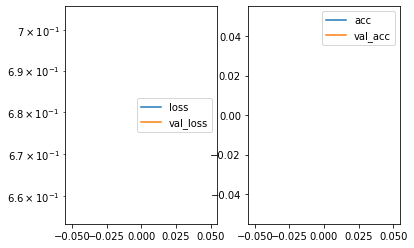

Predicted cell: Landmark Probability: [[0.7943356]]
True Cell type: Landmark
x [[0.6074722]]
True positional value x 0.421875
y [[0.5012492]]
True positional value y 0.578125


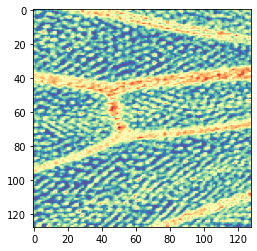

Epoch 2/250
2656/2656 [==============================] - 33s 12ms/step - loss: 0.6006 - accuracy: 0.8855 - val_loss: 0.6046 - val_accuracy: 0.8929

Epoch 00002: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.6045818137271064, 'val_accuracy': 0.8928571343421936, 'loss': 0.6005700526601938, 'accuracy': 0.88554215, 'lr': 1e-06}


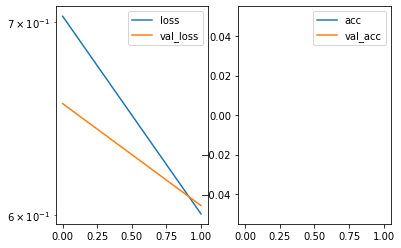

Predicted cell: Landmark Probability: [[0.946432]]
True Cell type: Landmark
x [[0.7373322]]
True positional value x 0.578125
y [[0.59177405]]
True positional value y 0.421875


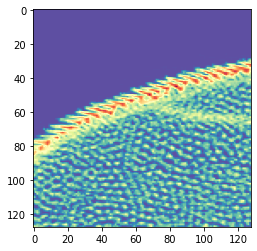

Epoch 3/250
2656/2656 [==============================] - 33s 12ms/step - loss: 0.5485 - accuracy: 0.8957 - val_loss: 0.5922 - val_accuracy: 0.8643

Epoch 00003: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5922460215432304, 'val_accuracy': 0.8642857074737549, 'loss': 0.548462162288018, 'accuracy': 0.89570785, 'lr': 1e-06}


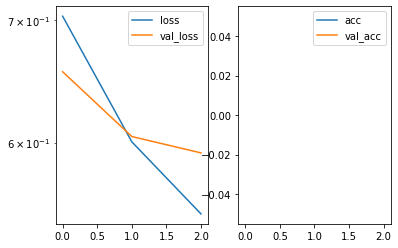

Predicted cell: Landmark Probability: [[0.9065535]]
True Cell type: Landmark
x [[0.5276455]]
True positional value x 0.5
y [[0.38756704]]
True positional value y 0.578125


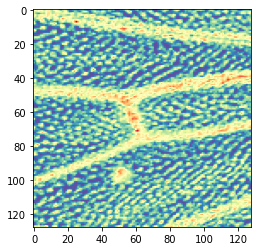

Epoch 4/250
2656/2656 [==============================] - 33s 12ms/step - loss: 0.5147 - accuracy: 0.8995 - val_loss: 0.5869 - val_accuracy: 0.8857

Epoch 00004: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5869004726409912, 'val_accuracy': 0.8857142925262451, 'loss': 0.5147335489157093, 'accuracy': 0.8994729, 'lr': 1e-06}


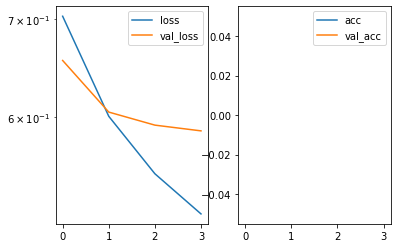

Predicted cell: Landmark Probability: [[0.9490936]]
True Cell type: Landmark
x [[0.35067388]]
True positional value x 0.421875
y [[0.43609798]]
True positional value y 0.421875


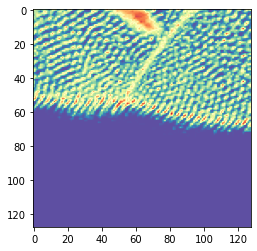

Epoch 5/250
2656/2656 [==============================] - 33s 12ms/step - loss: 0.4845 - accuracy: 0.9078 - val_loss: 0.5862 - val_accuracy: 0.8857

Epoch 00005: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.586234131029674, 'val_accuracy': 0.8857142925262451, 'loss': 0.48451253646109477, 'accuracy': 0.90775603, 'lr': 1e-06}


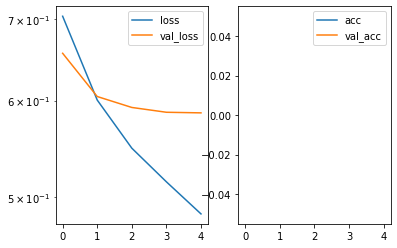

Predicted cell: Landmark Probability: [[0.98571044]]
True Cell type: Landmark
x [[0.47970396]]
True positional value x 0.5
y [[0.6612176]]
True positional value y 0.5


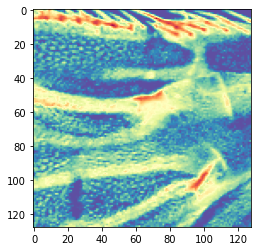

Epoch 6/250
2656/2656 [==============================] - 33s 12ms/step - loss: 0.4567 - accuracy: 0.9153 - val_loss: 0.5800 - val_accuracy: 0.8786

Epoch 00006: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5800068080425262, 'val_accuracy': 0.8785714507102966, 'loss': 0.45674853549754046, 'accuracy': 0.9152861, 'lr': 1e-06}


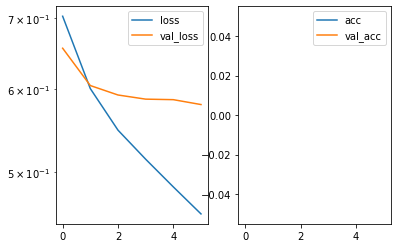

Predicted cell: Landmark Probability: [[0.9318621]]
True Cell type: Landmark
x [[0.4936579]]
True positional value x 0.421875
y [[0.76722956]]
True positional value y 0.421875


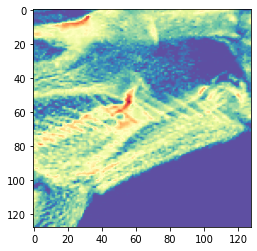

Epoch 7/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.4310 - accuracy: 0.9224 - val_loss: 0.5742 - val_accuracy: 0.8857

Epoch 00007: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.574218288064003, 'val_accuracy': 0.8857142925262451, 'loss': 0.4310199754335076, 'accuracy': 0.92243975, 'lr': 1e-06}


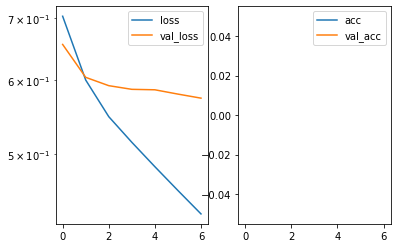

Predicted cell: Landmark Probability: [[0.8707085]]
True Cell type: Landmark
x [[0.5315612]]
True positional value x 0.578125
y [[0.38211024]]
True positional value y 0.578125


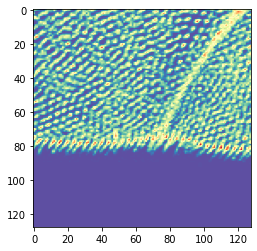

Epoch 8/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.4168 - accuracy: 0.9311 - val_loss: 0.5777 - val_accuracy: 0.8786

Epoch 00008: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5776557347604206, 'val_accuracy': 0.8785714507102966, 'loss': 0.41677051419055605, 'accuracy': 0.9310994, 'lr': 1e-06}


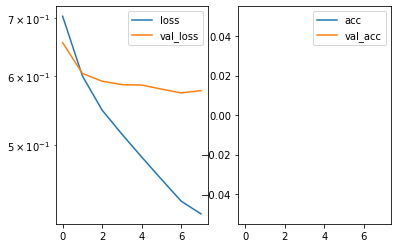

Predicted cell: Landmark Probability: [[0.9836083]]
True Cell type: Landmark
x [[0.6550992]]
True positional value x 0.578125
y [[0.61527956]]
True positional value y 0.578125


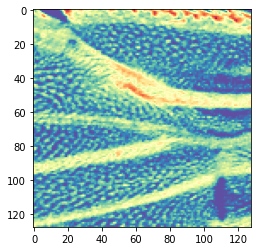

Epoch 9/250
2656/2656 [==============================] - 33s 12ms/step - loss: 0.3958 - accuracy: 0.9447 - val_loss: 0.5729 - val_accuracy: 0.9000

Epoch 00009: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5728577354124614, 'val_accuracy': 0.8999999761581421, 'loss': 0.39580080864659273, 'accuracy': 0.94465363, 'lr': 1e-06}


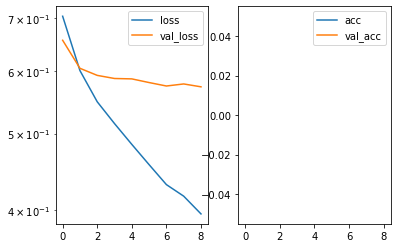

Predicted cell: Landmark Probability: [[0.9263251]]
True Cell type: Landmark
x [[0.41361493]]
True positional value x 0.421875
y [[0.5349745]]
True positional value y 0.5


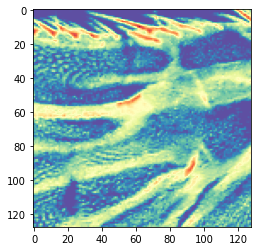

Epoch 10/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.3839 - accuracy: 0.9533 - val_loss: 0.5657 - val_accuracy: 0.8857

Epoch 00010: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5657123135668891, 'val_accuracy': 0.8857142925262451, 'loss': 0.3838670186653554, 'accuracy': 0.95331323, 'lr': 1e-06}


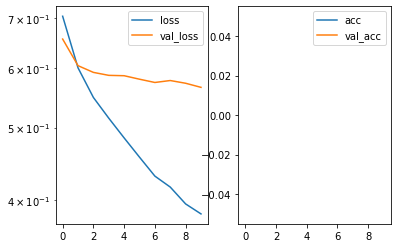

Predicted cell: Landmark Probability: [[0.9606874]]
True Cell type: Landmark
x [[0.57131124]]
True positional value x 0.578125
y [[0.6741619]]
True positional value y 0.578125


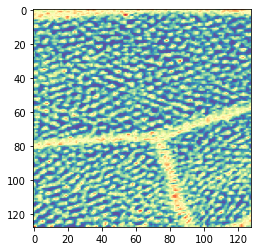

Epoch 11/250
2656/2656 [==============================] - 33s 12ms/step - loss: 0.3687 - accuracy: 0.9601 - val_loss: 0.5641 - val_accuracy: 0.8786

Epoch 00011: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5641156073127475, 'val_accuracy': 0.8785714507102966, 'loss': 0.3687363705451948, 'accuracy': 0.96009034, 'lr': 1e-06}


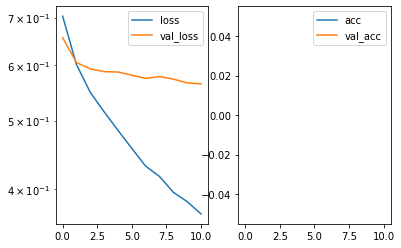

Predicted cell: Landmark Probability: [[0.86985403]]
True Cell type: Landmark
x [[0.5327462]]
True positional value x 0.578125
y [[0.41177484]]
True positional value y 0.578125


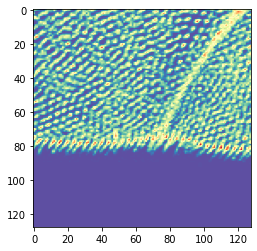

Epoch 12/250
2656/2656 [==============================] - 33s 12ms/step - loss: 0.3609 - accuracy: 0.9710 - val_loss: 0.5675 - val_accuracy: 0.9000

Epoch 00012: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5675499141216278, 'val_accuracy': 0.8999999761581421, 'loss': 0.3608650109360376, 'accuracy': 0.971009, 'lr': 1e-06}


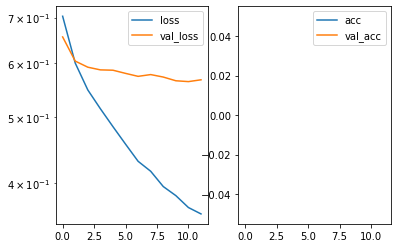

Predicted cell: Landmark Probability: [[0.9433224]]
True Cell type: Landmark
x [[0.8294238]]
True positional value x 0.578125
y [[0.47802252]]
True positional value y 0.421875


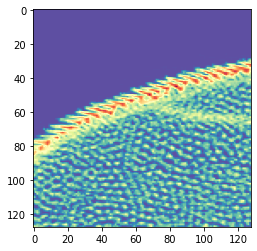

Epoch 13/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.3476 - accuracy: 0.9778 - val_loss: 0.5697 - val_accuracy: 0.9000

Epoch 00013: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5696935376950673, 'val_accuracy': 0.8999999761581421, 'loss': 0.34764257071158255, 'accuracy': 0.9777861, 'lr': 1e-06}


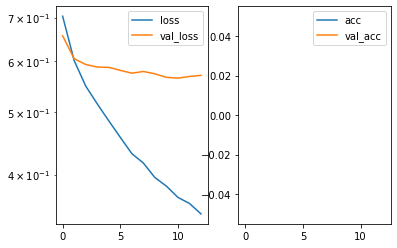

Predicted cell: Landmark Probability: [[0.7558768]]
True Cell type: Landmark
x [[0.72732973]]
True positional value x 0.5
y [[0.5720626]]
True positional value y 0.578125


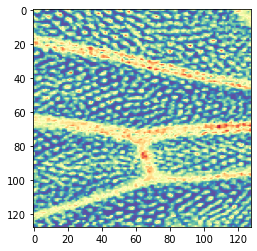

Epoch 14/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.3381 - accuracy: 0.9827 - val_loss: 0.5696 - val_accuracy: 0.9071

Epoch 00014: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5696343736989158, 'val_accuracy': 0.9071428775787354, 'loss': 0.3381356161132634, 'accuracy': 0.98268074, 'lr': 1e-06}


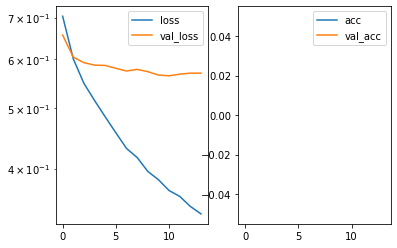

Predicted cell: Landmark Probability: [[0.97669494]]
True Cell type: Landmark
x [[0.73989445]]
True positional value x 0.578125
y [[0.6339689]]
True positional value y 0.578125


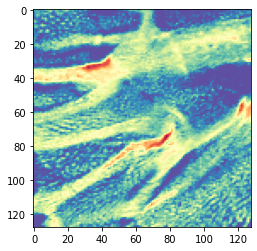

Epoch 15/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.3353 - accuracy: 0.9857 - val_loss: 0.5636 - val_accuracy: 0.9071

Epoch 00015: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.563555719596999, 'val_accuracy': 0.9071428775787354, 'loss': 0.3352758570024407, 'accuracy': 0.9856928, 'lr': 1e-06}


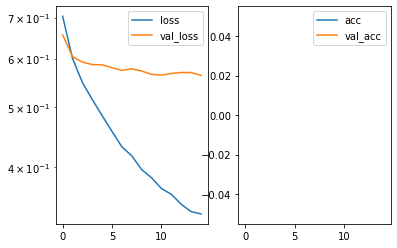

Predicted cell: Landmark Probability: [[0.9087425]]
True Cell type: Landmark
x [[0.49505997]]
True positional value x 0.421875
y [[0.7401366]]
True positional value y 0.5


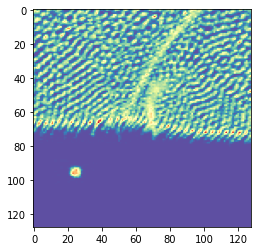

Epoch 16/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.3253 - accuracy: 0.9906 - val_loss: 0.5666 - val_accuracy: 0.9071

Epoch 00016: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5666294353348869, 'val_accuracy': 0.9071428775787354, 'loss': 0.32533037276512167, 'accuracy': 0.99058735, 'lr': 1e-06}


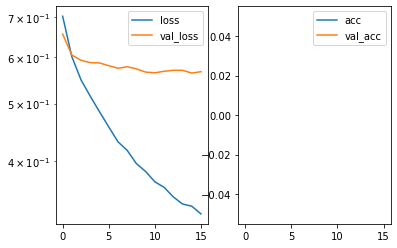

Predicted cell: Landmark Probability: [[0.7973299]]
True Cell type: Background
x [[0.2120404]]
True positional value x 0.5
y [[0.29140872]]
True positional value y 0.5


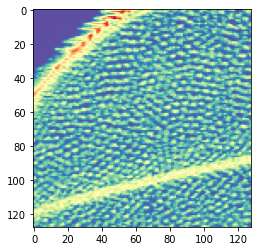

Epoch 17/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.3208 - accuracy: 0.9932 - val_loss: 0.5686 - val_accuracy: 0.9071

Epoch 00017: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5685973635741642, 'val_accuracy': 0.9071428775787354, 'loss': 0.3207962484918086, 'accuracy': 0.9932229, 'lr': 1e-06}


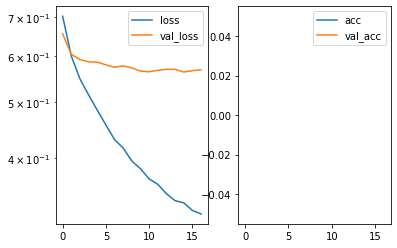

Predicted cell: Landmark Probability: [[0.9855306]]
True Cell type: Landmark
x [[0.31713647]]
True positional value x 0.578125
y [[0.44507548]]
True positional value y 0.421875


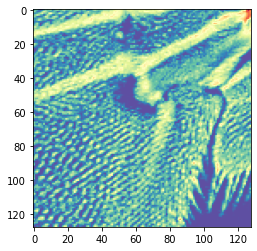

Epoch 18/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.3163 - accuracy: 0.9944 - val_loss: 0.5651 - val_accuracy: 0.9071

Epoch 00018: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5651479853051049, 'val_accuracy': 0.9071428775787354, 'loss': 0.316307200545288, 'accuracy': 0.9943524, 'lr': 1e-06}


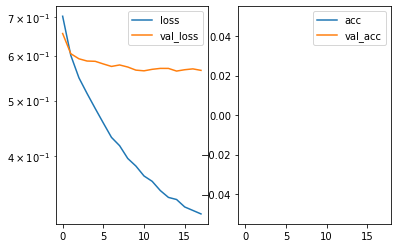

Predicted cell: Landmark Probability: [[0.9882734]]
True Cell type: Landmark
x [[0.55419165]]
True positional value x 0.5
y [[0.37959]]
True positional value y 0.578125


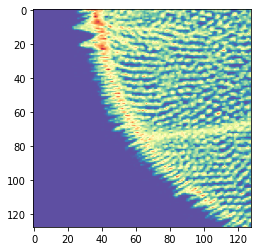

Epoch 19/250
2656/2656 [==============================] - 33s 12ms/step - loss: 0.3137 - accuracy: 0.9962 - val_loss: 0.5751 - val_accuracy: 0.9071

Epoch 00019: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5750834665128163, 'val_accuracy': 0.9071428775787354, 'loss': 0.31366251534726247, 'accuracy': 0.99623495, 'lr': 1e-06}


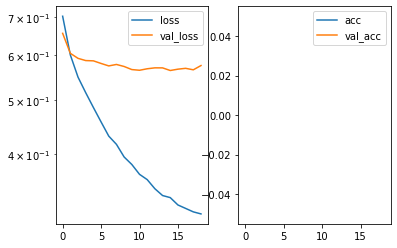

Predicted cell: Landmark Probability: [[0.9972926]]
True Cell type: Landmark
x [[0.61205035]]
True positional value x 0.421875
y [[0.6111496]]
True positional value y 0.578125


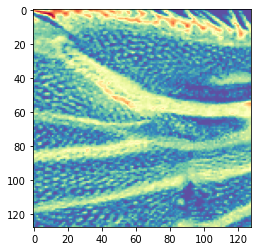

Epoch 20/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.3107 - accuracy: 0.9928 - val_loss: 0.5646 - val_accuracy: 0.9071

Epoch 00020: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5645800552197865, 'val_accuracy': 0.9071428775787354, 'loss': 0.3106827679572694, 'accuracy': 0.99284637, 'lr': 1e-06}


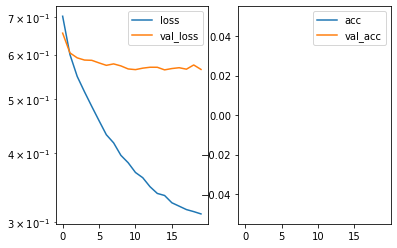

Predicted cell: Landmark Probability: [[0.90918183]]
True Cell type: Landmark
x [[0.54612994]]
True positional value x 0.578125
y [[0.41143808]]
True positional value y 0.578125


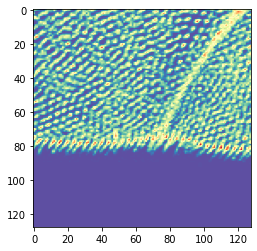

Epoch 21/250
2656/2656 [==============================] - 33s 12ms/step - loss: 0.3065 - accuracy: 0.9962 - val_loss: 0.5723 - val_accuracy: 0.9071

Epoch 00021: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5722985948835101, 'val_accuracy': 0.9071428775787354, 'loss': 0.30652976698096257, 'accuracy': 0.99623495, 'lr': 1e-06}


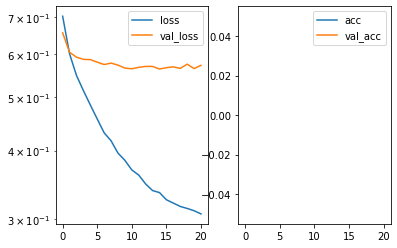

Predicted cell: Landmark Probability: [[0.9898996]]
True Cell type: Landmark
x [[0.33632123]]
True positional value x 0.578125
y [[0.707196]]
True positional value y 0.421875


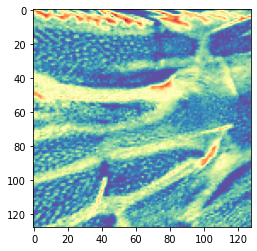

Epoch 22/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.3004 - accuracy: 0.9985 - val_loss: 0.5707 - val_accuracy: 0.9071

Epoch 00022: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5706895249230521, 'val_accuracy': 0.9071428775787354, 'loss': 0.3003807349736432, 'accuracy': 0.99849397, 'lr': 1e-06}


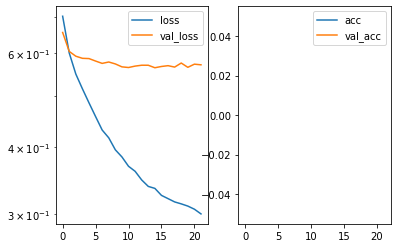

Predicted cell: Landmark Probability: [[0.89589316]]
True Cell type: Landmark
x [[0.21468394]]
True positional value x 0.5
y [[0.40456936]]
True positional value y 0.578125


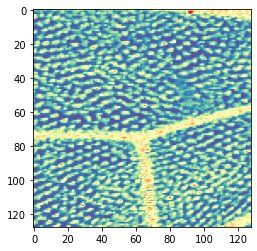

Epoch 23/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.3002 - accuracy: 0.9966 - val_loss: 0.5757 - val_accuracy: 0.9071

Epoch 00023: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5756822909627642, 'val_accuracy': 0.9071428775787354, 'loss': 0.3002240219972579, 'accuracy': 0.9966114, 'lr': 1e-06}


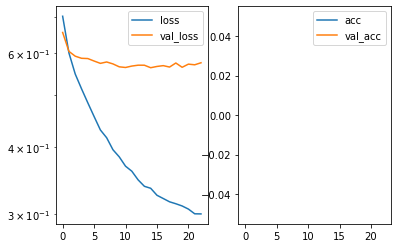

Predicted cell: Landmark Probability: [[0.99641836]]
True Cell type: Landmark
x [[0.4872354]]
True positional value x 0.421875
y [[0.6655861]]
True positional value y 0.421875


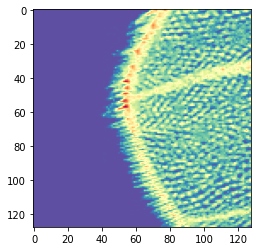

Epoch 24/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.2990 - accuracy: 0.9966 - val_loss: 0.5679 - val_accuracy: 0.9071

Epoch 00024: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5678794426577431, 'val_accuracy': 0.9071428775787354, 'loss': 0.2989533423300249, 'accuracy': 0.9966114, 'lr': 1e-06}


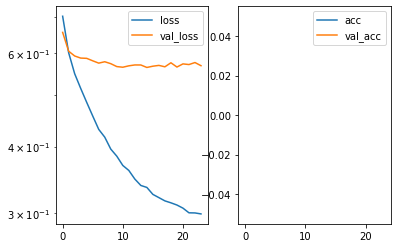

Predicted cell: Landmark Probability: [[0.99802434]]
True Cell type: Landmark
x [[0.645379]]
True positional value x 0.5
y [[0.70444864]]
True positional value y 0.5


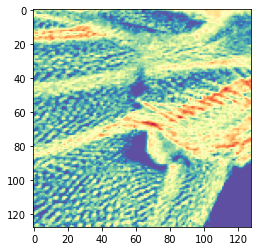

Epoch 25/250
2656/2656 [==============================] - 33s 12ms/step - loss: 0.2975 - accuracy: 0.9966 - val_loss: 0.5681 - val_accuracy: 0.9071

Epoch 00025: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5681023555142539, 'val_accuracy': 0.9071428775787354, 'loss': 0.2975078504981406, 'accuracy': 0.9966114, 'lr': 1e-06}


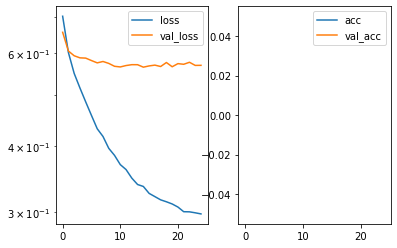

Predicted cell: Landmark Probability: [[0.7325232]]
True Cell type: Background
x [[0.36844242]]
True positional value x 0.5
y [[0.24085899]]
True positional value y 0.5


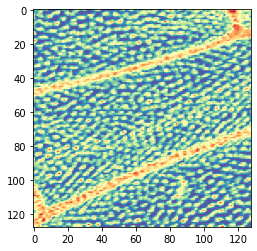

Epoch 26/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.2920 - accuracy: 0.9996 - val_loss: 0.5752 - val_accuracy: 0.9071

Epoch 00026: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5752101199967521, 'val_accuracy': 0.9071428775787354, 'loss': 0.29202084436294545, 'accuracy': 0.9996235, 'lr': 1e-06}


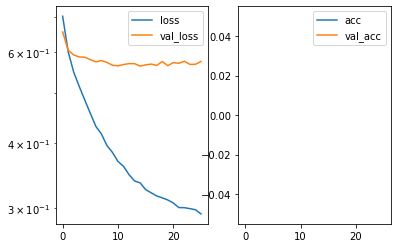

Predicted cell: Landmark Probability: [[0.9492289]]
True Cell type: Landmark
x [[0.46722937]]
True positional value x 0.421875
y [[0.7289614]]
True positional value y 0.5


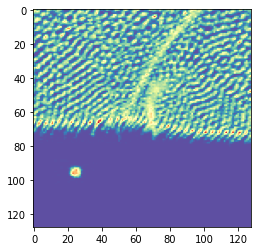

Epoch 27/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.2943 - accuracy: 0.9970 - val_loss: 0.5732 - val_accuracy: 0.9071

Epoch 00027: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5731964558362961, 'val_accuracy': 0.9071428775787354, 'loss': 0.29430664227489967, 'accuracy': 0.99698794, 'lr': 1e-06}


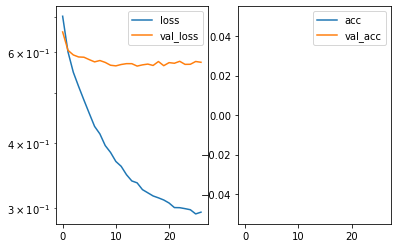

Predicted cell: Landmark Probability: [[0.986813]]
True Cell type: Landmark
x [[0.42896405]]
True positional value x 0.421875
y [[0.50906336]]
True positional value y 0.5


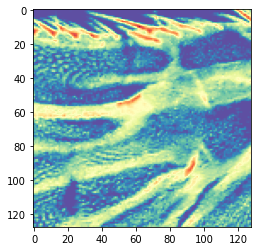

Epoch 28/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.2917 - accuracy: 0.9981 - val_loss: 0.5668 - val_accuracy: 0.9071

Epoch 00028: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5667900741100311, 'val_accuracy': 0.9071428775787354, 'loss': 0.2917461725827082, 'accuracy': 0.99811745, 'lr': 1e-06}


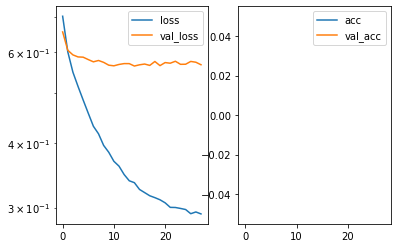

Predicted cell: Landmark Probability: [[0.9722306]]
True Cell type: Landmark
x [[0.6129336]]
True positional value x 0.421875
y [[0.57676613]]
True positional value y 0.5


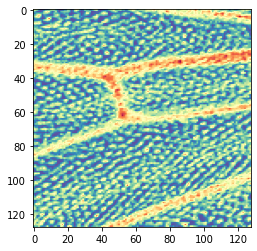

Epoch 29/250
2656/2656 [==============================] - 32s 12ms/step - loss: 0.2892 - accuracy: 0.9989 - val_loss: 0.5740 - val_accuracy: 0.9071

Epoch 00029: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5739751543317523, 'val_accuracy': 0.9071428775787354, 'loss': 0.28923521233520594, 'accuracy': 0.9988705, 'lr': 1e-06}


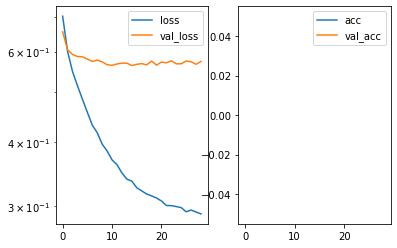

Predicted cell: Landmark Probability: [[0.81465924]]
True Cell type: Background
x [[0.21347022]]
True positional value x 0.5
y [[0.27007738]]
True positional value y 0.5


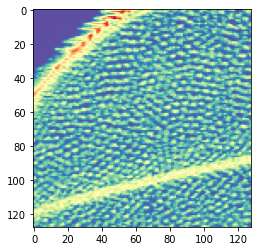

Epoch 30/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2887 - accuracy: 0.9977 - val_loss: 0.5649 - val_accuracy: 0.9071

Epoch 00030: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5649298003741673, 'val_accuracy': 0.9071428775787354, 'loss': 0.28866345379277164, 'accuracy': 0.997741, 'lr': 1e-06}


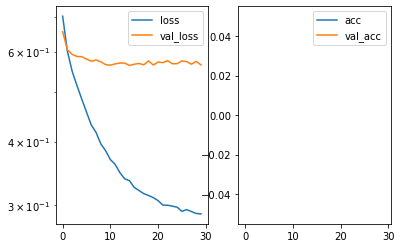

Predicted cell: Landmark Probability: [[0.99662375]]
True Cell type: Landmark
x [[0.55708075]]
True positional value x 0.5
y [[0.6766351]]
True positional value y 0.578125


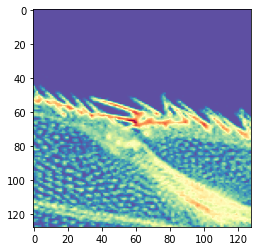

Epoch 31/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2867 - accuracy: 0.9989 - val_loss: 0.5714 - val_accuracy: 0.9071

Epoch 00031: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5713946883167539, 'val_accuracy': 0.9071428775787354, 'loss': 0.28665888583265153, 'accuracy': 0.9988705, 'lr': 1e-06}


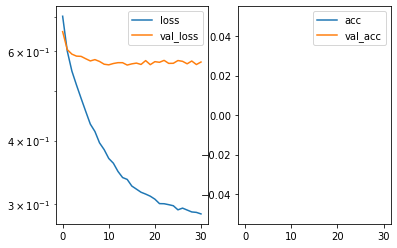

Predicted cell: Landmark Probability: [[0.9923713]]
True Cell type: Landmark
x [[0.3387479]]
True positional value x 0.578125
y [[0.7081479]]
True positional value y 0.421875


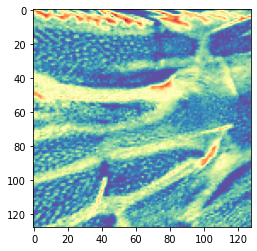

Epoch 32/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2859 - accuracy: 0.9989 - val_loss: 0.5755 - val_accuracy: 0.9071

Epoch 00032: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5754623051200595, 'val_accuracy': 0.9071428775787354, 'loss': 0.2859313356723771, 'accuracy': 0.9988705, 'lr': 1e-06}


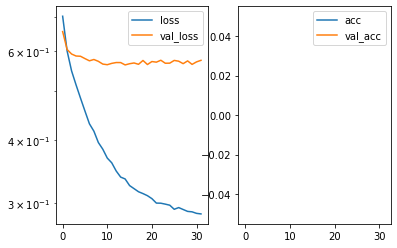

Predicted cell: Landmark Probability: [[0.9780707]]
True Cell type: Landmark
x [[0.8187916]]
True positional value x 0.578125
y [[0.4677257]]
True positional value y 0.421875


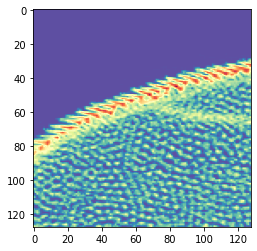

Epoch 33/250
2656/2656 [==============================] - 30s 11ms/step - loss: 0.2841 - accuracy: 0.9996 - val_loss: 0.5783 - val_accuracy: 0.9071

Epoch 00033: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5782679298094341, 'val_accuracy': 0.9071428775787354, 'loss': 0.2841223012207143, 'accuracy': 0.9996235, 'lr': 1e-06}


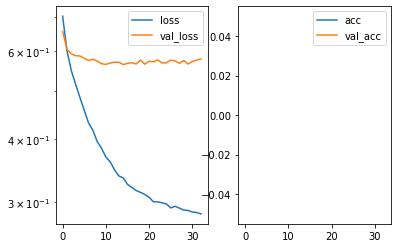

Predicted cell: Landmark Probability: [[0.9979766]]
True Cell type: Landmark
x [[0.52322626]]
True positional value x 0.5781249999999999
y [[0.42889246]]
True positional value y 0.578125


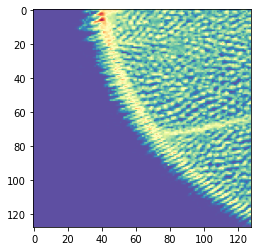

Epoch 34/250
2656/2656 [==============================] - 30s 11ms/step - loss: 0.2824 - accuracy: 0.9996 - val_loss: 0.5753 - val_accuracy: 0.9071

Epoch 00034: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5752923446042197, 'val_accuracy': 0.9071428775787354, 'loss': 0.28235658119062346, 'accuracy': 0.9996235, 'lr': 1e-06}


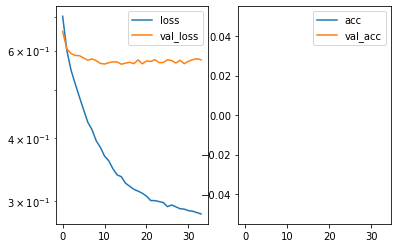

Predicted cell: Landmark Probability: [[0.9885605]]
True Cell type: Landmark
x [[0.66854435]]
True positional value x 0.5
y [[0.5717263]]
True positional value y 0.578125


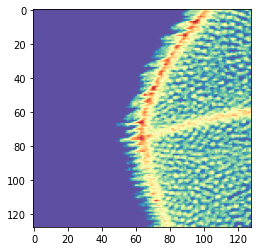

Epoch 35/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2827 - accuracy: 1.0000 - val_loss: 0.5818 - val_accuracy: 0.9071

Epoch 00035: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5817831605672836, 'val_accuracy': 0.9071428775787354, 'loss': 0.2826961900545172, 'accuracy': 1.0, 'lr': 1e-06}


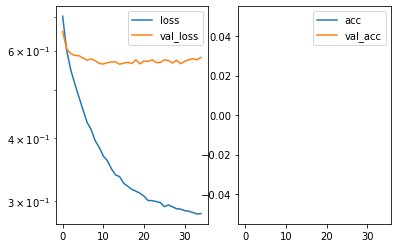

Predicted cell: Landmark Probability: [[0.99210644]]
True Cell type: Landmark
x [[0.4281121]]
True positional value x 0.421875
y [[0.4876576]]
True positional value y 0.5


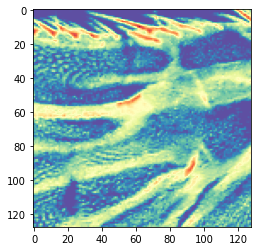

Epoch 36/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2820 - accuracy: 0.9992 - val_loss: 0.5781 - val_accuracy: 0.9071

Epoch 00036: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5781488248280117, 'val_accuracy': 0.9071428775787354, 'loss': 0.28201711110501404, 'accuracy': 0.999247, 'lr': 1e-06}


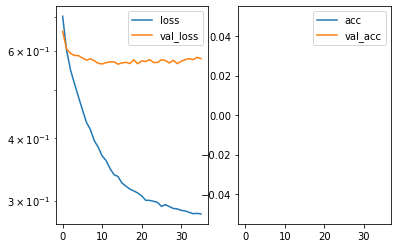

Predicted cell: Landmark Probability: [[0.8156597]]
True Cell type: Background
x [[0.6979037]]
True positional value x 0.5
y [[0.26453266]]
True positional value y 0.5


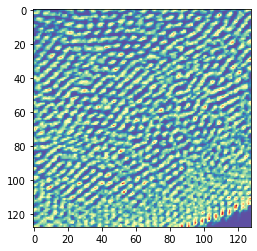

Epoch 37/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2818 - accuracy: 0.9992 - val_loss: 0.5768 - val_accuracy: 0.9071

Epoch 00037: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.576804620879037, 'val_accuracy': 0.9071428775787354, 'loss': 0.2817747973982828, 'accuracy': 0.999247, 'lr': 1e-06}


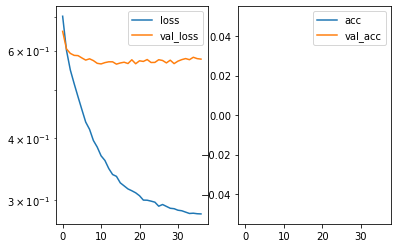

Predicted cell: Landmark Probability: [[0.9984107]]
True Cell type: Landmark
x [[0.35601398]]
True positional value x 0.5781249999999998
y [[0.5435068]]
True positional value y 0.421875


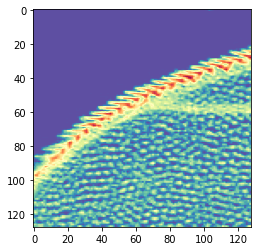

Epoch 38/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2800 - accuracy: 1.0000 - val_loss: 0.5786 - val_accuracy: 0.9071

Epoch 00038: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5786328017711639, 'val_accuracy': 0.9071428775787354, 'loss': 0.27997506232595587, 'accuracy': 1.0, 'lr': 1e-06}


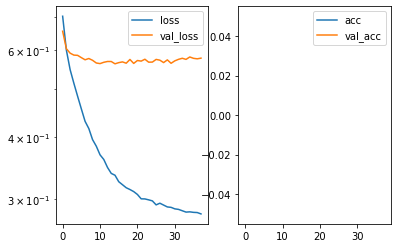

Predicted cell: Landmark Probability: [[0.99896896]]
True Cell type: Landmark
x [[0.5041513]]
True positional value x 0.5
y [[0.75189507]]
True positional value y 0.578125


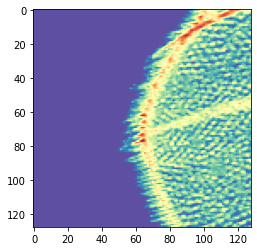

Epoch 39/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2794 - accuracy: 0.9996 - val_loss: 0.5816 - val_accuracy: 0.9071

Epoch 00039: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5816192477941513, 'val_accuracy': 0.9071428775787354, 'loss': 0.27939508195562535, 'accuracy': 0.9996235, 'lr': 1e-06}


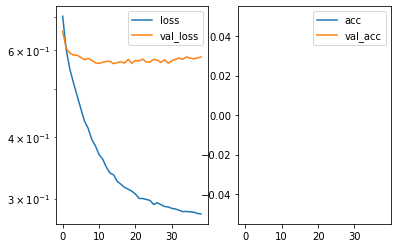

Predicted cell: Landmark Probability: [[0.998667]]
True Cell type: Landmark
x [[0.605708]]
True positional value x 0.421875
y [[0.5575704]]
True positional value y 0.578125


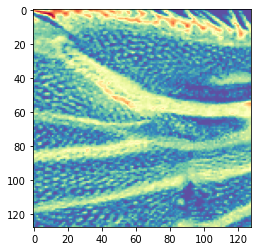

Epoch 40/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2774 - accuracy: 0.9996 - val_loss: 0.5804 - val_accuracy: 0.9071

Epoch 00040: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5804432034492493, 'val_accuracy': 0.9071428775787354, 'loss': 0.27737865875284357, 'accuracy': 0.9996235, 'lr': 1e-06}


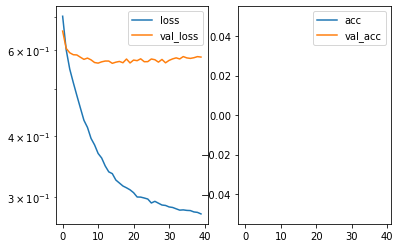

Predicted cell: Landmark Probability: [[0.9939347]]
True Cell type: Landmark
x [[0.37523338]]
True positional value x 0.5
y [[0.65476227]]
True positional value y 0.578125


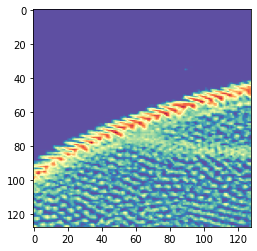

Epoch 41/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2787 - accuracy: 0.9992 - val_loss: 0.5832 - val_accuracy: 0.9071

Epoch 00041: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5831940791436604, 'val_accuracy': 0.9071428775787354, 'loss': 0.27866678518882715, 'accuracy': 0.999247, 'lr': 1e-06}


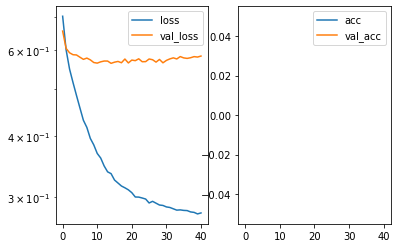

Predicted cell: Landmark Probability: [[0.9963509]]
True Cell type: Landmark
x [[0.52937925]]
True positional value x 0.5
y [[0.52380913]]
True positional value y 0.5


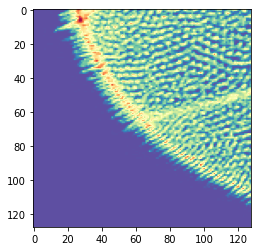

Epoch 42/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2776 - accuracy: 0.9992 - val_loss: 0.5753 - val_accuracy: 0.9071

Epoch 00042: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5752727219036647, 'val_accuracy': 0.9071428775787354, 'loss': 0.27759458324367026, 'accuracy': 0.999247, 'lr': 1e-06}


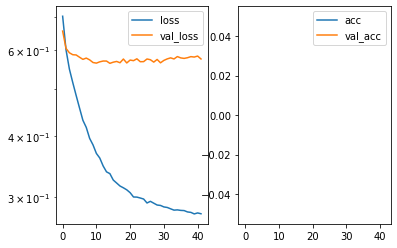

Predicted cell: Landmark Probability: [[0.99439645]]
True Cell type: Landmark
x [[0.41953915]]
True positional value x 0.5
y [[0.4808741]]
True positional value y 0.421875


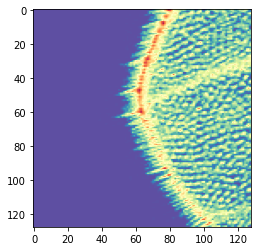

Epoch 43/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2770 - accuracy: 0.9996 - val_loss: 0.5839 - val_accuracy: 0.9071

Epoch 00043: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5838838581527982, 'val_accuracy': 0.9071428775787354, 'loss': 0.27698051523282585, 'accuracy': 0.9996235, 'lr': 1e-06}


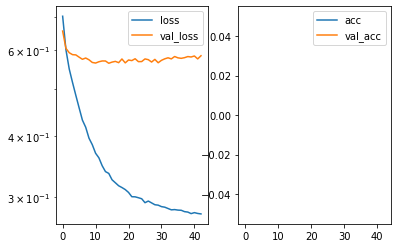

Predicted cell: Landmark Probability: [[0.9898352]]
True Cell type: Landmark
x [[0.57968605]]
True positional value x 0.578125
y [[0.3910748]]
True positional value y 0.5


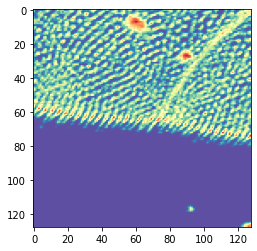

Epoch 44/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2769 - accuracy: 0.9992 - val_loss: 0.5761 - val_accuracy: 0.9071

Epoch 00044: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5
{'val_loss': 0.5760803605828967, 'val_accuracy': 0.9071428775787354, 'loss': 0.2768576835697315, 'accuracy': 0.999247, 'lr': 1e-06}


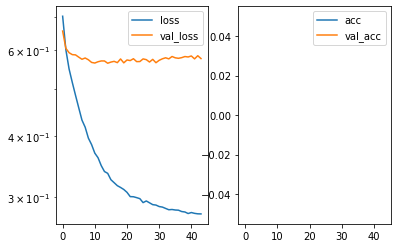

Predicted cell: Landmark Probability: [[0.9988939]]
True Cell type: Landmark
x [[0.49218985]]
True positional value x 0.578125
y [[0.76074094]]
True positional value y 0.578125


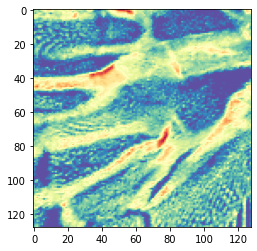

Epoch 45/250
2656/2656 [==============================] - 31s 12ms/step - loss: 0.2756 - accuracy: 0.9992 - val_loss: 0.5832 - val_accuracy: 0.9071

Epoch 00045: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7.h5


In [ ]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
